In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATASET_FILE1 = "/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_optimization.csv"
DATASET_FILE2 = "/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_optimization_agg.csv"
DATASET_FILE3 = "/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_optimization_tct.csv"
DATASET_FILE4 = "/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_optimization_baseline.csv"



In [90]:
data1 = pd.read_csv(DATASET_FILE1)
data2 = pd.read_csv(DATASET_FILE2)
data3 = pd.read_csv(DATASET_FILE3)
data4 = pd.read_csv(DATASET_FILE4)

data = pd.concat([data1, data2, data3, data4])
data_agg = data[data["Model"] == "BM25 + AggretrieverPQ"].sort_values(by='Alpha')
data_agg_baseline = data[data["Model"] == "BM25 + Aggretriever"].sort_values(by='Alpha')
data_tct = data[data["Model"] == "BM25 + TctColBertPQ"].sort_values(by='Alpha')
data_tct_baseline = data[data["Model"] == "BM25 + TctColBert"].sort_values(by='Alpha')

assert (data_tct['Alpha'].to_numpy() == data_tct_baseline['Alpha'].to_numpy()).all()
assert (data_agg['Alpha'].to_numpy() == data_agg_baseline['Alpha'].to_numpy()).all()

# Aggretriever Analysis

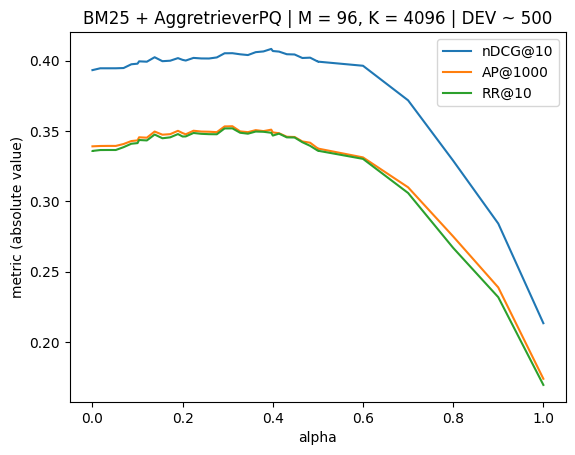

In [32]:
ndcg_scores_agg = data_agg["nDCG@10"].to_numpy()
ndcg_scores_agg_baseline = data_agg_baseline["nDCG@10"].to_numpy()
ap_scores_agg = data_agg["AP@1000"].to_numpy()
ap_scores_agg_baseline = data_agg_baseline["AP@1000"].to_numpy()
rr_scores_agg = data_agg["RR@10"].to_numpy()
rr_scores_agg_baseline = data_agg_baseline["RR@10"].to_numpy()
alpha_values = data_agg["Alpha"].to_numpy()


plt.plot(alpha_values, ndcg_scores_agg, label='nDCG@10')
plt.plot(alpha_values, ap_scores_agg, label='AP@1000')
plt.plot(alpha_values, rr_scores_agg, label='RR@10')
plt.xlabel('alpha')
plt.ylabel('metric (absolute value)')
plt.title("BM25 + AggretrieverPQ | M = 96, K = 4096 | DEV ~ 500")
plt.legend()
plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_agg_absolute.png")
plt.show()

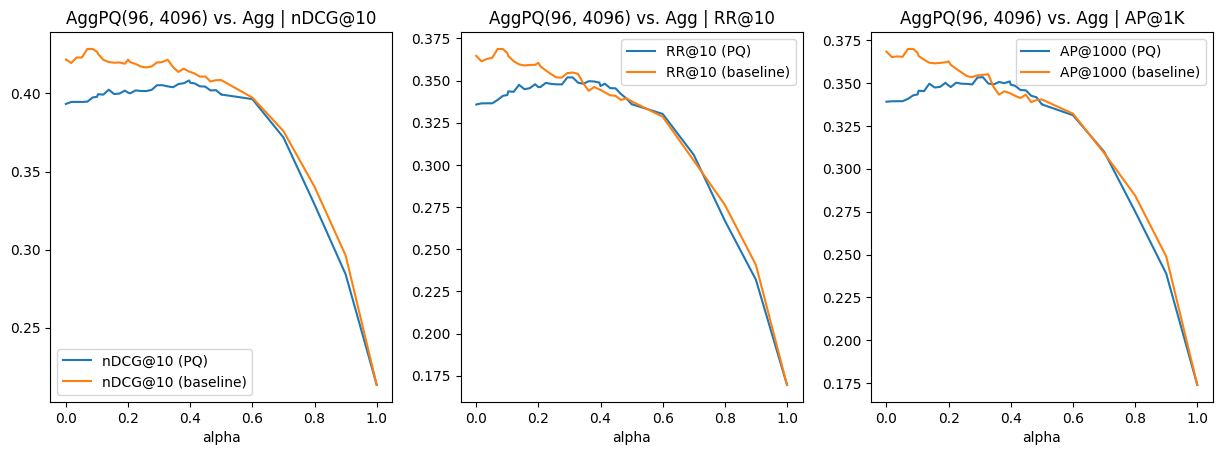

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
ax1.plot(alpha_values, ndcg_scores_agg, label='nDCG@10 (PQ)')
ax1.plot(alpha_values, ndcg_scores_agg_baseline, label='nDCG@10 (baseline)')
ax1.legend()
ax1.set_xlabel('alpha')
ax1.set_title('AggPQ(96, 4096) vs. Agg | nDCG@10')

ax2.plot(alpha_values, rr_scores_agg, label='RR@10 (PQ)')
ax2.plot(alpha_values, rr_scores_agg_baseline, label='RR@10 (baseline)')
ax2.set_xlabel('alpha')
ax2.set_title('AggPQ(96, 4096) vs. Agg | RR@10')
ax2.legend()


ax3.plot(alpha_values, ap_scores_agg, label='AP@1000 (PQ)')
ax3.plot(alpha_values, ap_scores_agg_baseline, label='AP@1000 (baseline)')
ax3.legend()
ax3.set_xlabel('alpha')
ax3.set_title('AggPQ(96, 4096) vs. Agg | AP@1K')


plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_agg_absolute_v_baseline.png")
plt.show()

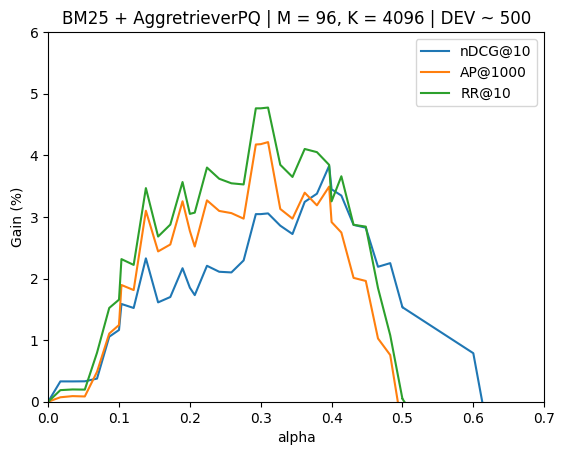

In [56]:
ndcg_gains_agg = (ndcg_scores_agg - ndcg_scores_agg[0]) / ndcg_scores_agg[0] * 100
ap_gains_agg = (ap_scores_agg - ap_scores_agg[0]) / ap_scores_agg[0] * 100
rr_gains_agg = (rr_scores_agg - rr_scores_agg[0]) / rr_scores_agg[0] * 100

ndcg_gains_agg_baseline = (ndcg_scores_agg_baseline - ndcg_scores_agg_baseline[0]) / ndcg_scores_agg_baseline[0] * 100
ap_gains_agg_baseline = (ap_scores_agg_baseline - ap_scores_agg_baseline[0]) / ap_scores_agg_baseline[0] * 100
rr_gains_agg_baseline = (rr_scores_agg_baseline - rr_scores_agg_baseline[0]) / rr_scores_agg_baseline[0] * 100

plt.plot(alpha_values, ndcg_gains_agg, label='nDCG@10')
plt.plot(alpha_values, ap_gains_agg, label='AP@1000')
plt.plot(alpha_values, rr_gains_agg, label='RR@10')
plt.xlabel('alpha')
plt.ylim(0, 6)
plt.xlim(0, 0.7)
plt.ylabel('Gain (%)')
plt.title("BM25 + AggretrieverPQ | M = 96, K = 4096 | DEV ~ 500")
plt.legend()
plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_agg_gain.png")
plt.show()

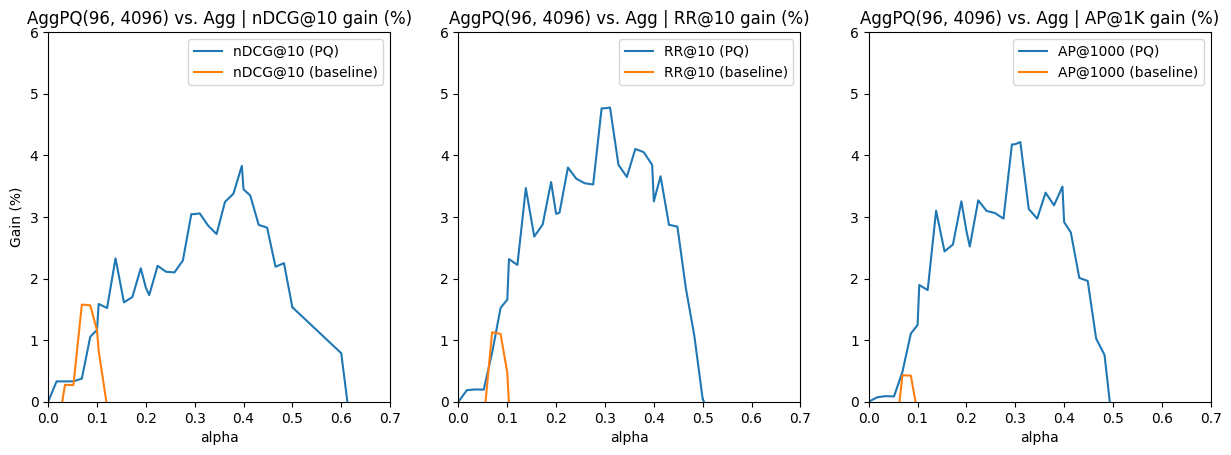

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
ax1.plot(alpha_values, ndcg_gains_agg, label='nDCG@10 (PQ)')
ax1.plot(alpha_values, ndcg_gains_agg_baseline, label='nDCG@10 (baseline)')
ax1.legend()
ax1.set_xlim([0, 0.7])
ax1.set_ylim(0, 6)
ax1.set_xlabel('alpha')
ax1.set_title('AggPQ(96, 4096) vs. Agg | nDCG@10 gain (%)')

ax2.plot(alpha_values, rr_gains_agg, label='RR@10 (PQ)')
ax2.plot(alpha_values, rr_gains_agg_baseline, label='RR@10 (baseline)')
ax2.legend()
ax2.set_xlim([0, 0.7])
ax2.set_ylim(0, 6)
ax2.set_xlabel('alpha')
ax2.set_title('AggPQ(96, 4096) vs. Agg | RR@10 gain (%)')

ax3.plot(alpha_values, ap_gains_agg, label='AP@1000 (PQ)')
ax3.plot(alpha_values, ap_gains_agg_baseline, label='AP@1000 (baseline)')
ax3.set_xlim([0, 0.7])
ax3.legend()
ax3.set_ylim(0, 6)
ax3.set_xlabel('alpha')
ax3.set_title('AggPQ(96, 4096) vs. Agg | AP@1K gain (%)')


ax1.set_ylabel('Gain (%)')
plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_agg_gain_v_baseline.png")
plt.show()

# TctColBert Analysis

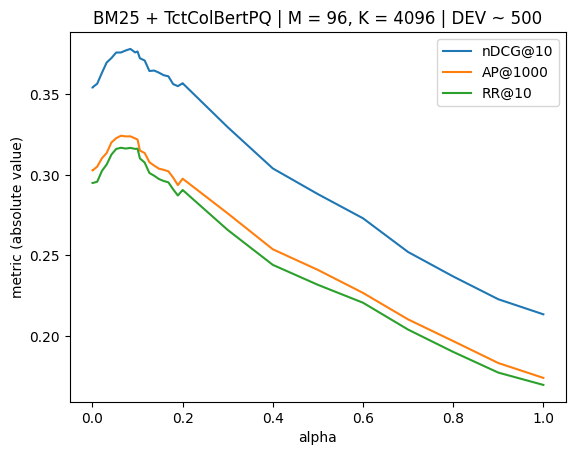

In [100]:
ndcg_scores_tct = data_tct["nDCG@10"].to_numpy()
ndcg_scores_tct_baseline = data_tct_baseline["nDCG@10"].to_numpy()

ap_scores_tct = data_tct["AP@1000"].to_numpy()
ap_scores_tct_baseline = data_tct_baseline["AP@1000"].to_numpy()

rr_scores_tct = data_tct["RR@10"].to_numpy()
rr_scores_tct_baseline = data_tct_baseline["RR@10"].to_numpy()

alpha_values_tct = data_tct["Alpha"].to_numpy()

plt.plot(alpha_values_tct, ndcg_scores_tct, label='nDCG@10')
plt.plot(alpha_values_tct, ap_scores_tct, label='AP@1000')
plt.plot(alpha_values_tct, rr_scores_tct, label='RR@10')
plt.xlabel('alpha')
plt.ylabel('metric (absolute value)')
plt.title("BM25 + TctColBertPQ | M = 96, K = 4096 | DEV ~ 500")
plt.legend()
plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_tct_absolute.png")
plt.show()

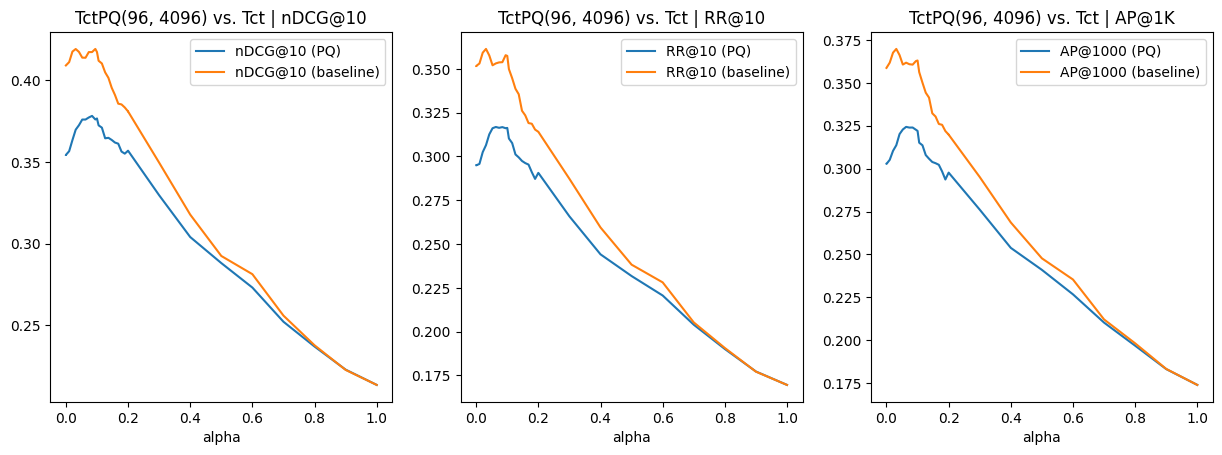

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
ax1.plot(alpha_values_tct, ndcg_scores_tct, label='nDCG@10 (PQ)')
ax1.plot(alpha_values_tct, ndcg_scores_tct_baseline, label='nDCG@10 (baseline)')
ax1.legend()
ax1.set_xlabel('alpha')
ax1.set_title('TctPQ(96, 4096) vs. Tct | nDCG@10')

ax2.plot(alpha_values_tct, rr_scores_tct, label='RR@10 (PQ)')
ax2.plot(alpha_values_tct, rr_scores_tct_baseline, label='RR@10 (baseline)')
ax2.set_xlabel('alpha')
ax2.set_title('TctPQ(96, 4096) vs. Tct | RR@10')
ax2.legend()


ax3.plot(alpha_values_tct, ap_scores_tct, label='AP@1000 (PQ)')
ax3.plot(alpha_values_tct, ap_scores_tct_baseline, label='AP@1000 (baseline)')
ax3.legend()
ax3.set_xlabel('alpha')
ax3.set_title('TctPQ(96, 4096) vs. Tct | AP@1K')


plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_tct_absolute_v_baseline.png")
plt.show()

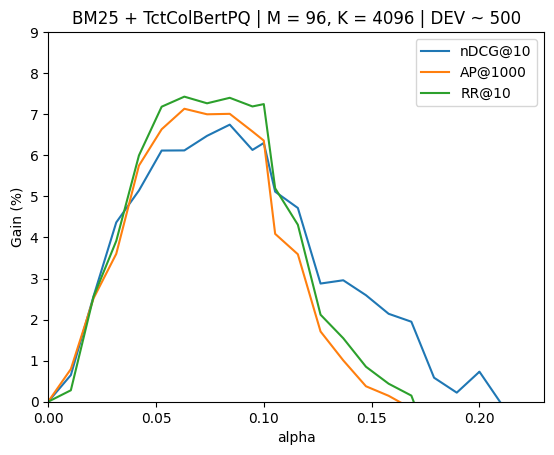

In [106]:
ndcg_gains_tct = (ndcg_scores_tct - ndcg_scores_tct[0]) / ndcg_scores_tct[0] * 100
ap_gains_tct = (ap_scores_tct - ap_scores_tct[0]) / ap_scores_tct[0] * 100
rr_gains_tct = (rr_scores_tct - rr_scores_tct[0]) / rr_scores_tct[0] * 100

ndcg_gains_tct_baseline = (ndcg_scores_tct_baseline - ndcg_scores_tct_baseline[0]) / ndcg_scores_tct_baseline[0] * 100
ap_gains_tct_baseline = (ap_scores_tct_baseline - ap_scores_tct_baseline[0]) / ap_scores_tct_baseline[0] * 100
rr_gains_tct_baseline = (rr_scores_tct_baseline - rr_scores_tct_baseline[0]) / rr_scores_tct_baseline[0] * 100

plt.plot(alpha_values_tct, ndcg_gains_tct, label='nDCG@10')
plt.plot(alpha_values_tct, ap_gains_tct, label='AP@1000')
plt.plot(alpha_values_tct, rr_gains_tct, label='RR@10')
plt.xlabel('alpha')
plt.ylim(0, 9)
plt.xlim(0, 0.23)
plt.ylabel('Gain (%)')
plt.title("BM25 + TctColBertPQ | M = 96, K = 4096 | DEV ~ 500")
plt.legend()
plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_tct_gain.png")
plt.show()

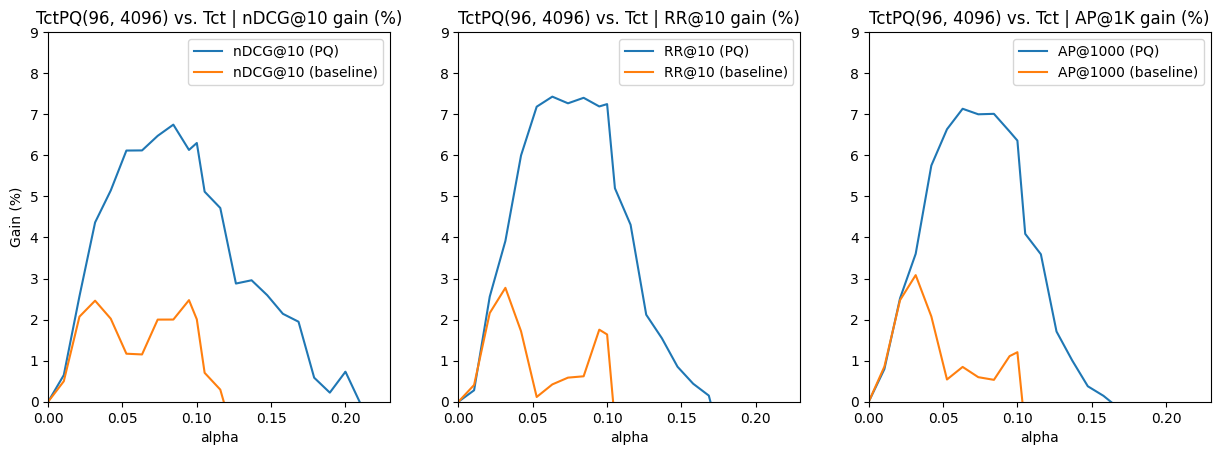

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
ax1.plot(alpha_values_tct, ndcg_gains_tct, label='nDCG@10 (PQ)')
ax1.plot(alpha_values_tct, ndcg_gains_tct_baseline, label='nDCG@10 (baseline)')
ax1.legend()
ax1.set_xlim([0, 0.23])
ax1.set_ylim(0, 9)
ax1.set_xlabel('alpha')
ax1.set_title('TctPQ(96, 4096) vs. Tct | nDCG@10 gain (%)')

ax2.plot(alpha_values_tct, rr_gains_tct, label='RR@10 (PQ)')
ax2.plot(alpha_values_tct, rr_gains_tct_baseline, label='RR@10 (baseline)')
ax2.legend()
ax2.set_xlim([0, 0.23])
ax2.set_ylim(0, 9)
ax2.set_xlabel('alpha')
ax2.set_title('TctPQ(96, 4096) vs. Tct | RR@10 gain (%)')

ax3.plot(alpha_values_tct, ap_gains_tct, label='AP@1000 (PQ)')
ax3.plot(alpha_values_tct, ap_gains_tct_baseline, label='AP@1000 (baseline)')
ax3.set_xlim([0, 0.23])
ax3.legend()
ax3.set_ylim(0, 9)
ax3.set_xlabel('alpha')
ax3.set_title('TctPQ(96, 4096) vs. Tct | AP@1K gain (%)')


ax1.set_ylabel('Gain (%)')
plt.savefig("/home/catalinlup/MyWorkspace/MasterThesis/results/alpha_optimization/alpha_0_1_tct_gain_v_baseline.png")
plt.show()

### Optimal AGG parameter: 0.3
### Optimial TCT parameter: 0.1